In [20]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(precision=2)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from emoinvest.stock_data_importer.stock_import import get_single_stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

height has been deprecated.



In [21]:
# S&P500 ticker symbol = ''^GSPC'

In [41]:
df = get_single_stock('AMZN', '2016-01-01', '2018-09-10')
df.head()

,high,low,open,close,volume,adj_close,ticker_symbol
Date,,,,,,,
2016-01-04,657.720,627.510,656.290,636.990,9314500,636.990,AMZN
2016-01-05,646.910,627.650,646.860,633.790,5822600,633.790,AMZN
2016-01-06,639.790,620.310,622.000,632.650,5329200,632.650,AMZN
2016-01-07,630.000,605.210,621.800,607.940,7074900,607.940,AMZN
2016-01-08,624.140,606.000,619.660,607.050,5512900,607.050,AMZN


In [42]:
df.tail()

,high,low,open,close,volume,adj_close,ticker_symbol
Date,,,,,,,
2018-09-04,2050.500,2013.000,2026.500,2039.510,5721100,2039.510,AMZN
2018-09-05,2040.380,1989.890,2038.110,1994.820,8220600,1994.820,AMZN
2018-09-06,2007.500,1935.210,2006.510,1958.310,7488700,1958.310,AMZN
2018-09-07,1975.200,1937.350,1938.710,1952.070,4892600,1952.070,AMZN
2018-09-10,1973.040,1931.520,1971.000,1939.010,4544800,1939.010,AMZN


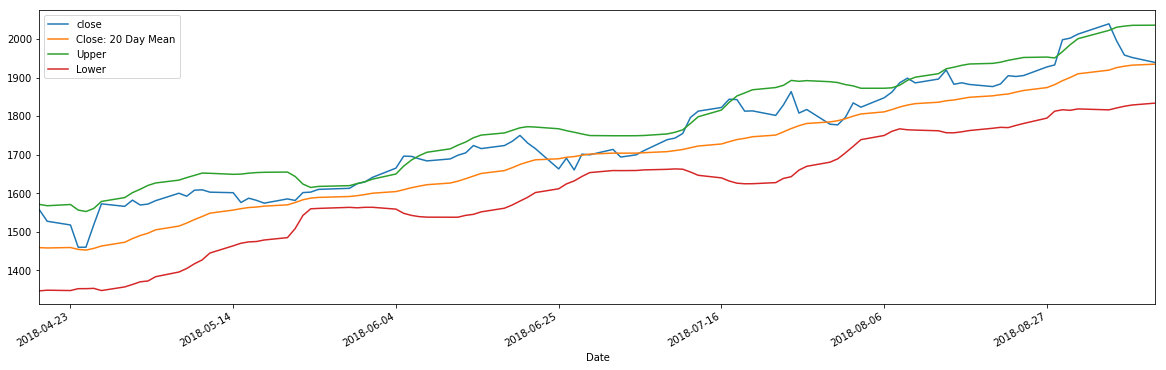

In [45]:
## Bolinger bands
# Close 20 MA
df['Close: 20 Day Mean'] = df['close'].rolling(20).mean()
# Upper = 20M + 2*std(20)
df['Upper'] = df['Close: 20 Day Mean'] + 2*(df['close'].rolling(20).std())
# Lower = 20MA - 2*std(20)
df['Lower'] = df['Close: 20 Day Mean'] - 2*(df['close'].rolling(20).std())
# Close
df[['close', 'Close: 20 Day Mean', 'Upper', 'Lower']].tail(100).plot(figsize=(20,6))